In [21]:
library(dplyr)
library(lubridate)
library(stringr)
library(ggplot2)

In [2]:
netflix_titles <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-04-20/netflix_titles.csv')

Parsed with column specification:
cols(
  show_id = col_character(),
  type = col_character(),
  title = col_character(),
  director = col_character(),
  cast = col_character(),
  country = col_character(),
  date_added = col_character(),
  release_year = col_double(),
  rating = col_character(),
  duration = col_character(),
  listed_in = col_character(),
  description = col_character()
)



In [3]:
netflix_titles

show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
s1,TV Show,3%,NA,"Joao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor."
s2,Movie,7:19,Jorge Michel Grau,"Demian Bichir, Hector Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive."
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi & Fantasy","In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack.
s6,TV Show,46,Serdar Akar,"Erdal Besikcioglu, Yasemin Allen, Melis Birkan, Sayg<U+0131>n Soysal, Berkan Sal, Metin Belgin, Ayca Eren, Selin Uludogan, Ozay Fecht, Suna Y<U+0131>ld<U+0131>zoglu",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect."
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before death finds them."
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",United States,"November 1, 2019",1997,R,119 min,Dramas,"After one of his high school students attacks him, dedicated teacher Trevor Garfield grows weary of the gang warfare in the New York City school system and moves to California to teach there, thinking it must be a less hostile environment."
s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist wife treats the bizarre medical condition of a psychic patient, who knows much more than he's leading on."


# Ideas
Genres?
Genres + Countries?

In [34]:
df <- netflix_titles %>% 
    select(show_id, country, listed_in) %>% 
    filter(!is.na(country), !is.na(listed_in)) %>% 
    tidyr::separate_rows(listed_in, convert = TRUE, sep=',') %>% 
    distinct %>% 
    count(country, listed_in, sort = T) %>% 
    filter(!listed_in %in% c('International Movies', 'International TV Shows')) %>% 
    group_by(country) %>% 
    top_n(3)

df %>% head

Selecting by n



country,listed_in,n
<chr>,<chr>,<int>
India,International Movies,750
India,Dramas,365
United States,Documentaries,358
United States,Dramas,333
United States,Comedies,297
India,Comedies,249


In [36]:
df %>% nrow

[1] 1822

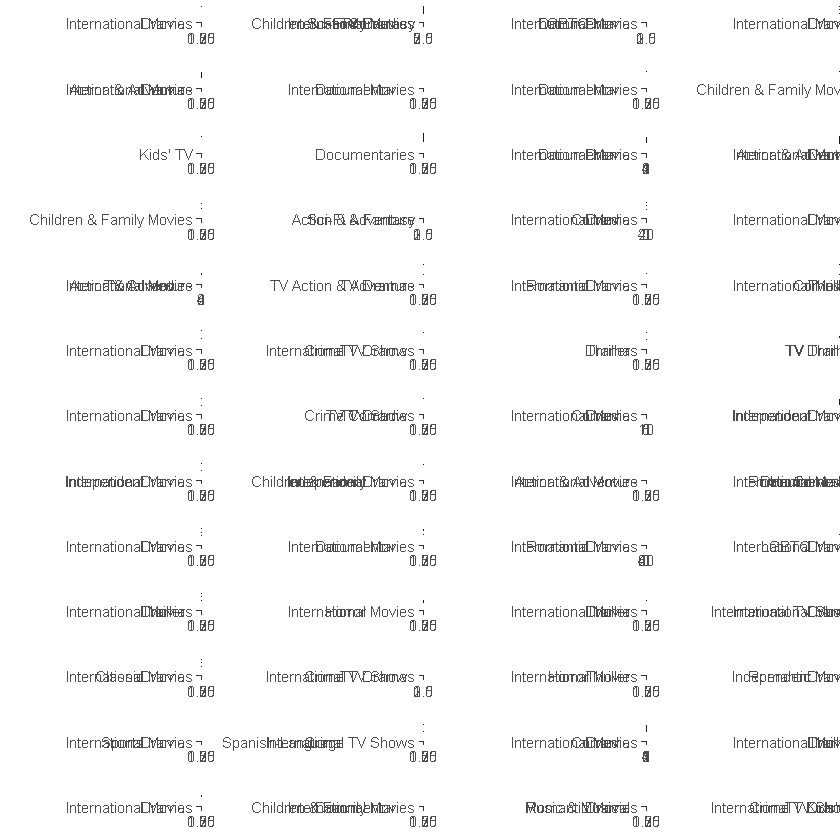

In [41]:
df %>% 
#     filter(country %in% c('United States', 'India')) %>% 
    ggplot(aes(x = listed_in, y = n)) +
    geom_bar(stat = 'identity') +
    coord_flip() +
    facet_wrap(~country, scale='free', ncol = 4)

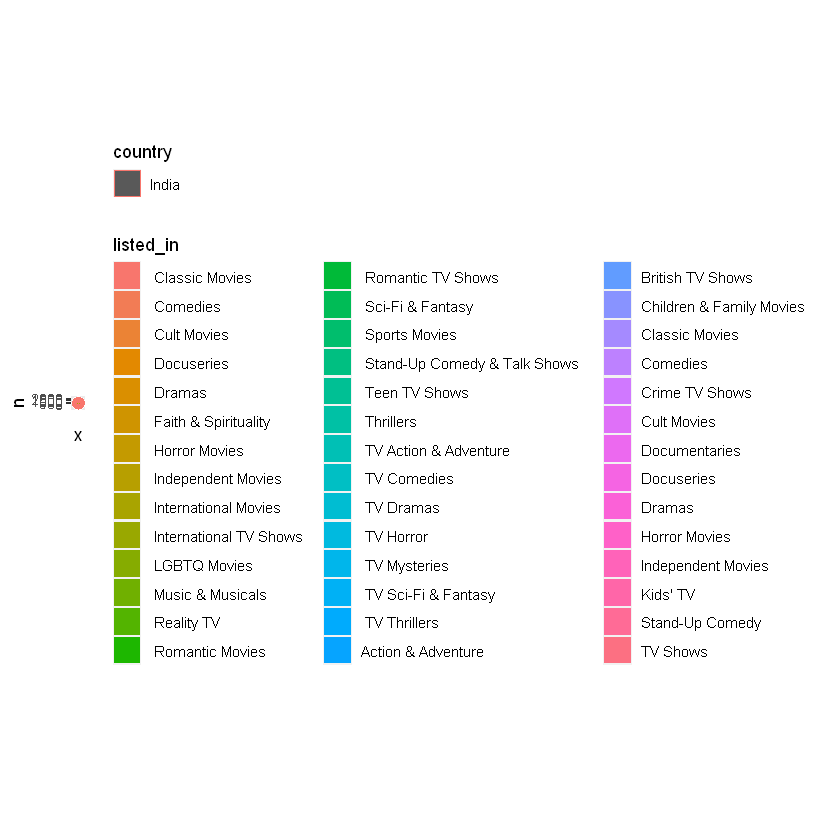

In [32]:
df %>% 
filter(country == 'India') %>% 
ggplot(aes(x = " ", y = n, group = country, colour = country, fill = listed_in)) +
    geom_bar(width = 1, stat = 'identity') +
    coord_polar(start = 0) #+ 
#     facet_grid(.~ subject) +
#     theme_void()